In [ ]:
!pip install torch torchvision torchaudio
!pip install easyocr

In [2]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

c:\Users\amvk2\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
IMAGE_PATH = 'book.jpg'

In [15]:
reader = easyocr.Reader(['en'], gpu=True)
result = reader.readtext(IMAGE_PATH)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[29, 23], [266, 23], [266, 66], [29, 66]], 'WORKBOOK', 0.999400091507559),
 ([[47, 67], [253, 67], [253, 111], [47, 111]], 'ATOMIC', 0.9849150877168584),
 ([[57, 105], [240, 105], [240, 149], [57, 149]],
  'HABITS',
  0.9997368984800491),
 ([[47, 353], [71, 353], [71, 367], [47, 367]], 'An', 0.9933226483631978),
 ([[68, 349], [253, 349], [253, 370], [68, 370]],
  'Implementation Guide t0',
  0.8581817509714329),
 ([[27, 369], [271, 369], [271, 389], [27, 389]],
  "James Clear' $ Book: Atomic Habits",
  0.9215453014403518),
 ([[43, 417], [255, 417], [255, 435], [43, 435]],
  'INSPIRATIONAL CREATOR',
  0.8535621597561889)]

In [16]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

single line ocr

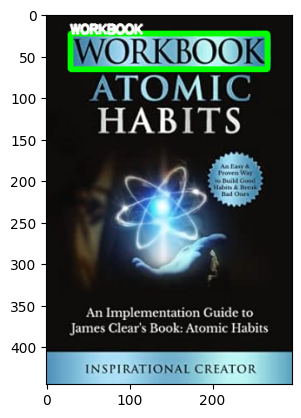

In [17]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img, top_left, bottom_right, (0,255,0), 5)
img = cv2.putText(img, text, top_left, font, .5, (255,255,255),2,cv2.LINE_AA) 
plt.imshow(img)
plt.show()

multiple lines ocr

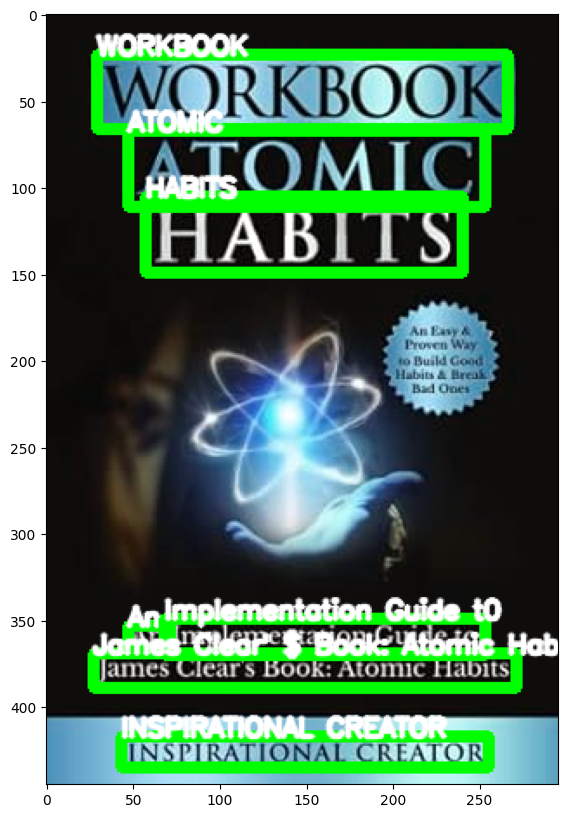

In [18]:
img = cv2.imread(IMAGE_PATH)
for detection in result:
    top_left = tuple([int(val) for val in detection[0][0]])
    bottom_right = tuple([int(val) for val in detection[0][2]])
    text = detection[1]
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.rectangle(img, top_left, bottom_right, (0,255,0), 5)
    img = cv2.putText(img, text, top_left, font, .5, (255,255,255),2,cv2.LINE_AA) 
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()